# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
!pip install numpy==1.25

In [ ]:
!pip install --force-reinstall --no-cache-dir numpy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 202.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 189.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 278.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 206.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 165.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 208.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: smart-open
    Found existing i

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import TruncatedSVD
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re

In [ ]:
def preprocess(text):
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\'", "", text)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS and len(word) > 3]
    return tokens

In [ ]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data
sample_texts = random.sample(texts, 2000)
processed_texts = [preprocess(doc) for doc in sample_texts]

In [ ]:
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

lda_model = models.LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=10,
                            random_state=42,
                            passes=10)

lda_topics = lda_model.print_topics(num_words=5)


lda_coherence_model = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
lda_coherence_score = lda_coherence_model.get_coherence()

In [ ]:
# joining tokens for vectorizer input
joined_docs = [' '.join(doc) for doc in processed_texts]


vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(joined_docs)


lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(X_tfidf)

terms = vectorizer.get_feature_names_out()

# extracting top 5 words for each topic from the SVD components
lsa_topics = []
for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:5]
    lsa_topics.append(sorted_terms)


lsa_topic_words = [[term for term, _ in topic] for topic in lsa_topics]
lsa_coherence_model = CoherenceModel(topics=lsa_topic_words, texts=processed_texts, dictionary=dictionary, coherence='c_v')
lsa_coherence_score = lsa_coherence_model.get_coherence()

In [ ]:
# displaying topics & coherence

print("\nLDA Topics:")
for i, topic in enumerate(lda_topics):
    print(f"Topic {i+1}: {topic}")

print("\nLSA Topics:")
for i, topic in enumerate(lsa_topics):
    print(f"Topic {i+1}: {[term for term, _ in topic]}")

print(f"\nLDA Coherence Score: {lda_coherence_score:.4f}")
print(f"LSA Coherence Score: {lsa_coherence_score:.4f}")


LDA Topics:
Topic 1: (0, '0.007*"disk" + 0.006*"drives" + 0.005*"drive" + 0.005*"hard" + 0.004*"bios"')
Topic 2: (1, '0.008*"dont" + 0.007*"think" + 0.005*"know" + 0.005*"people" + 0.005*"like"')
Topic 3: (2, '0.006*"entry" + 0.004*"dont" + 0.004*"time" + 0.004*"like" + 0.004*"does"')
Topic 4: (3, '0.013*"image" + 0.005*"data" + 0.004*"mg9v" + 0.004*"processing" + 0.003*"software"')
Topic 5: (4, '0.006*"university" + 0.005*"professor" + 0.004*"history" + 0.004*"like" + 0.004*"random"')
Topic 6: (5, '0.004*"just" + 0.004*"right" + 0.003*"like" + 0.003*"used" + 0.003*"mail"')
Topic 7: (6, '0.005*"space" + 0.005*"argument" + 0.004*"jesus" + 0.004*"fallacy" + 0.004*"people"')
Topic 8: (7, '0.011*"jpeg" + 0.010*"myers" + 0.007*"people" + 0.007*"dont" + 0.006*"know"')
Topic 9: (8, '0.006*"people" + 0.004*"just" + 0.003*"point" + 0.003*"armenian" + 0.003*"dont"')
Topic 10: (9, '0.006*"like" + 0.006*"just" + 0.006*"scsi" + 0.005*"windows" + 0.005*"dont"')

LSA Topics:
Topic 1: ['just', 'like'

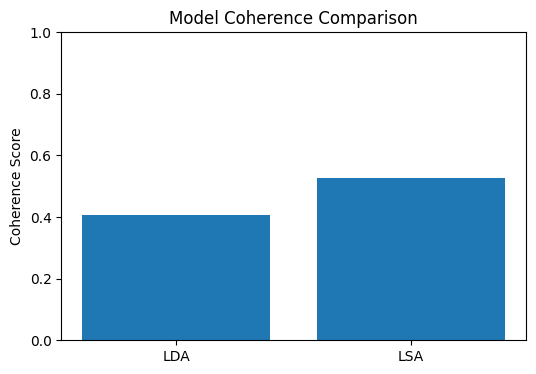

In [ ]:
import matplotlib.pyplot as plt

models = ['LDA', 'LSA']
scores = [lda_coherence_score, lsa_coherence_score]

plt.figure(figsize=(6,4))
plt.bar(models, scores)
plt.ylabel('Coherence Score')
plt.title('Model Coherence Comparison')
plt.ylim(0, 1)
plt.show()


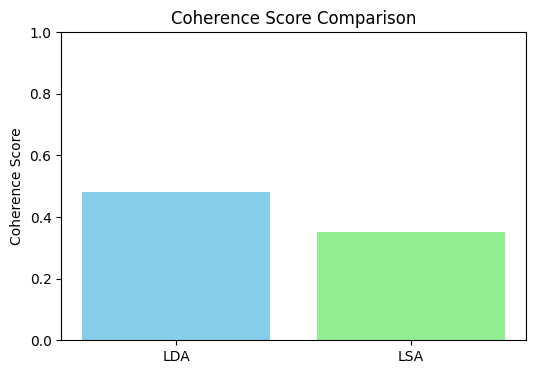


🔸 LDA Topic WordClouds


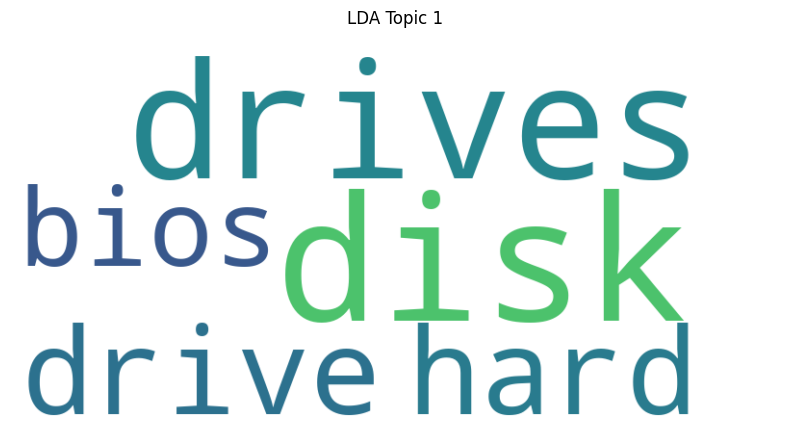

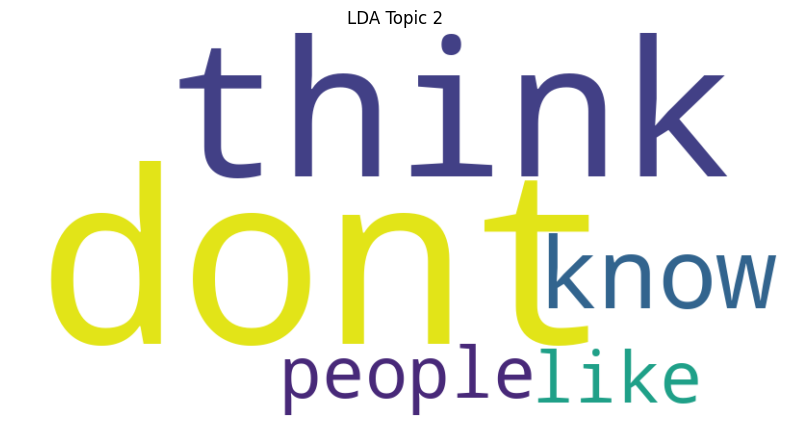

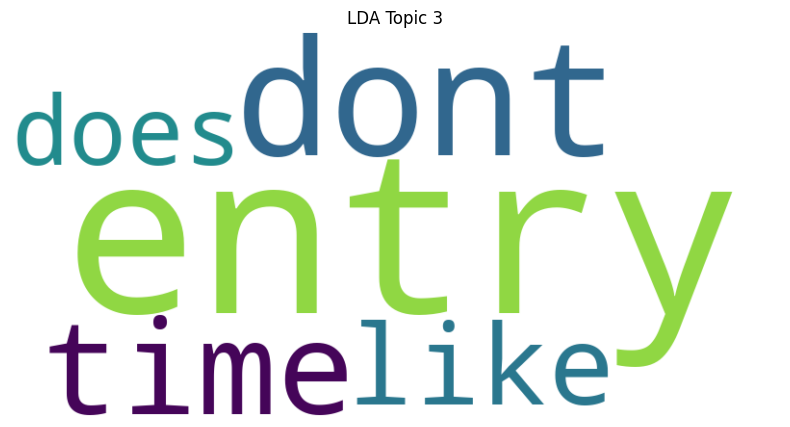

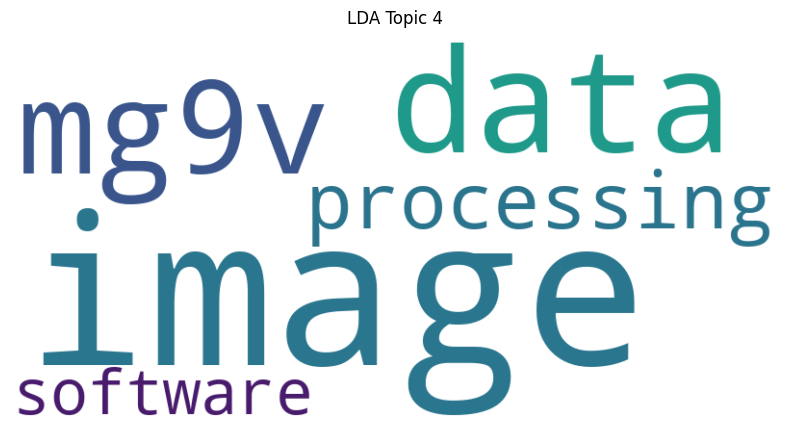

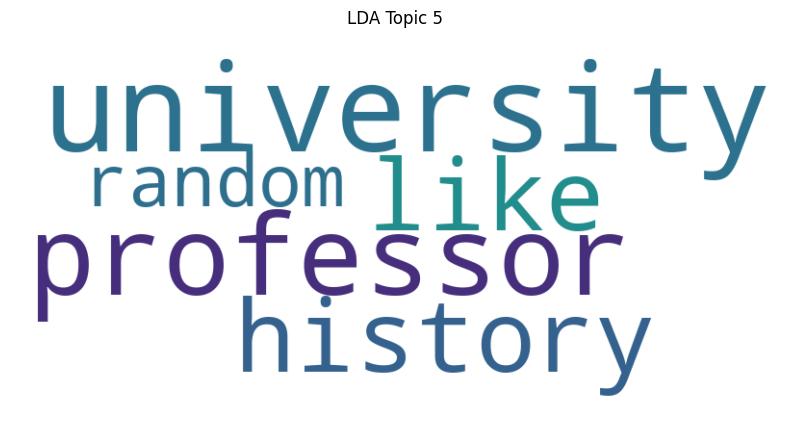

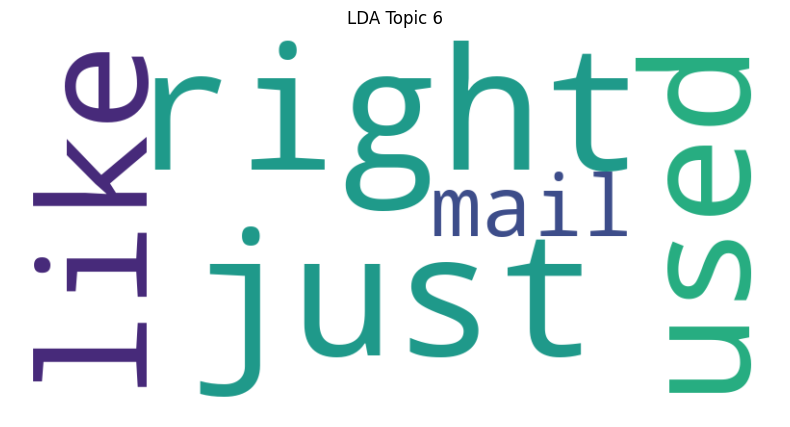

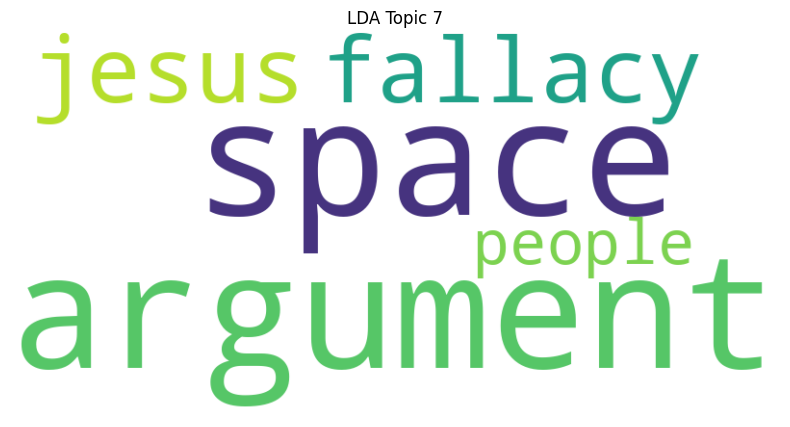

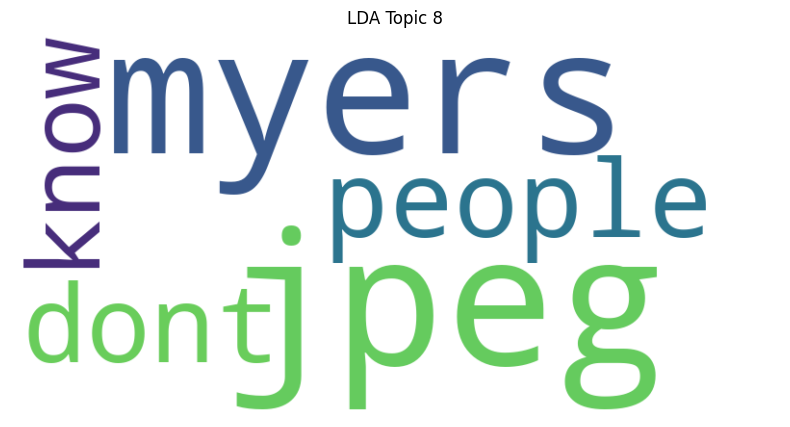

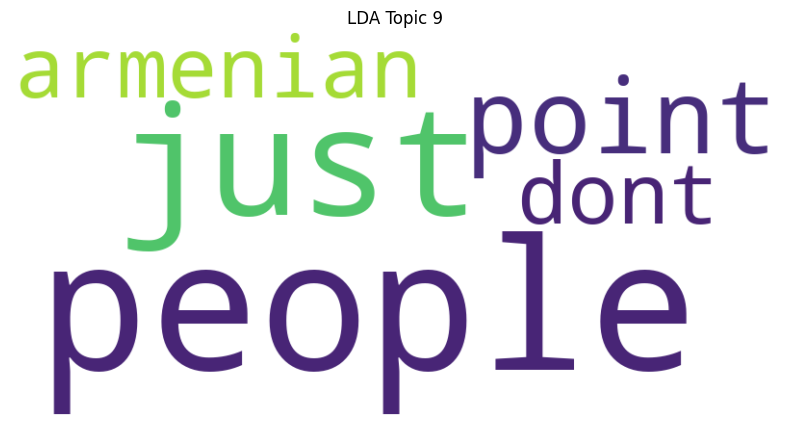

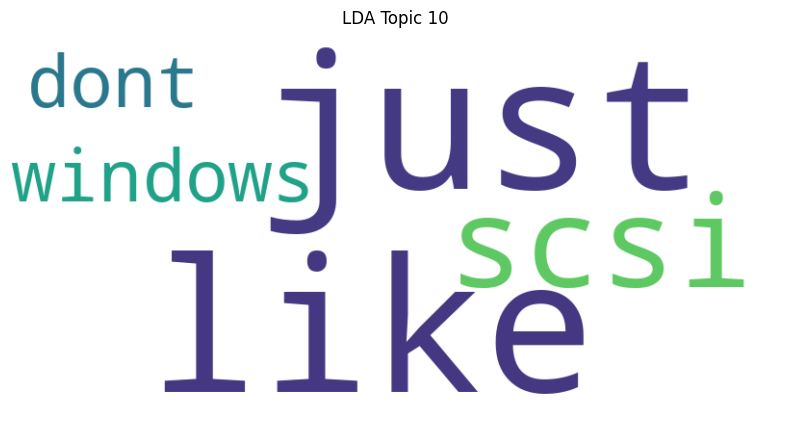


🔹 LSA Topic WordClouds


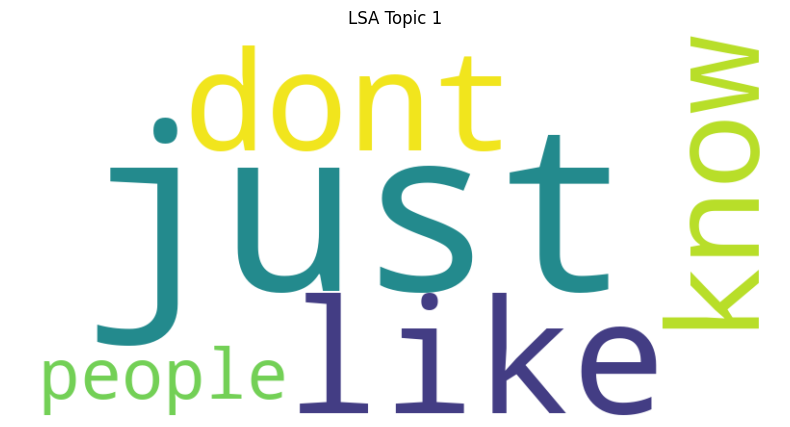

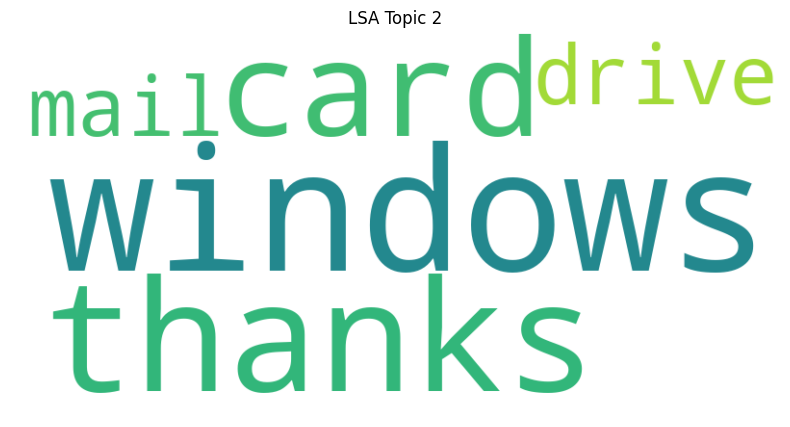

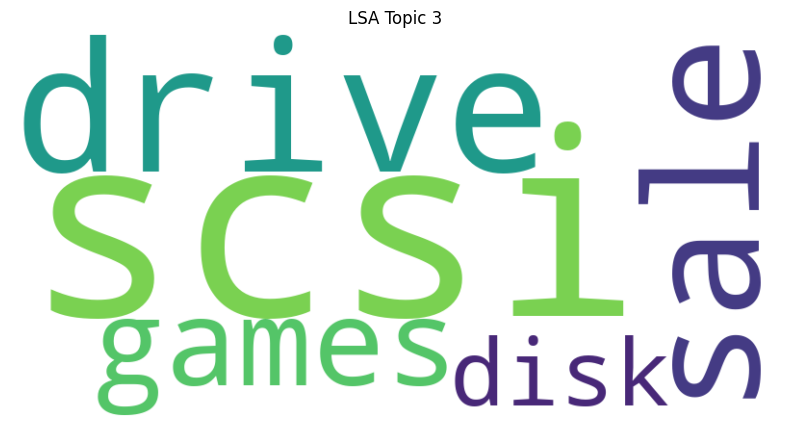

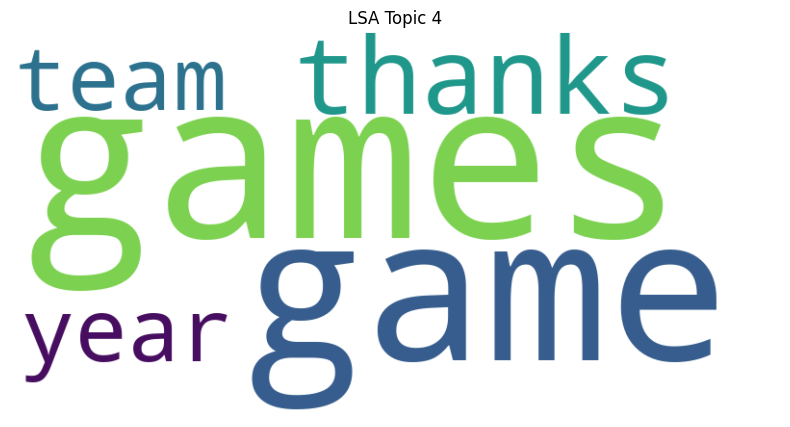

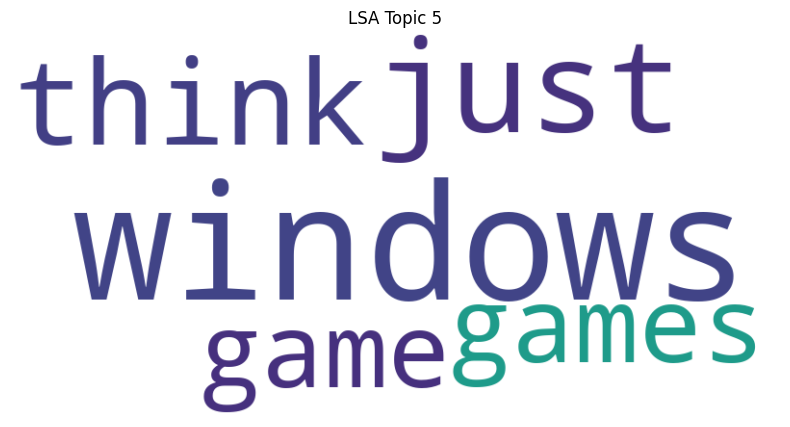

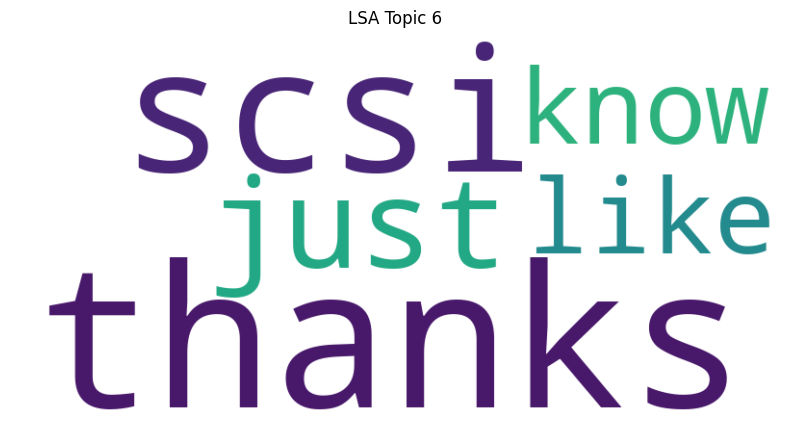

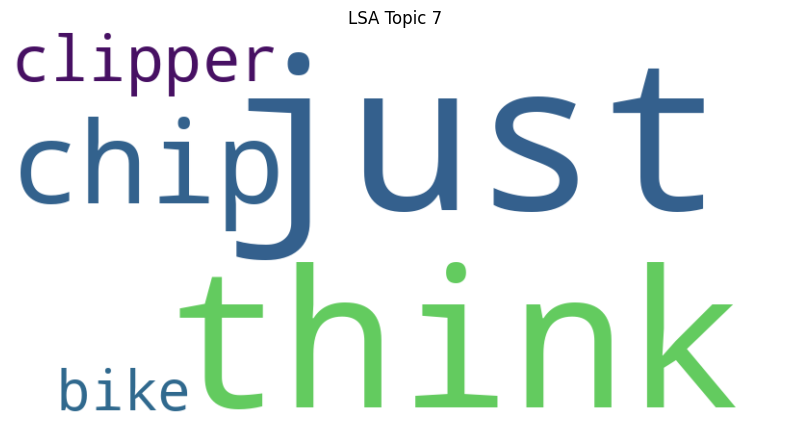

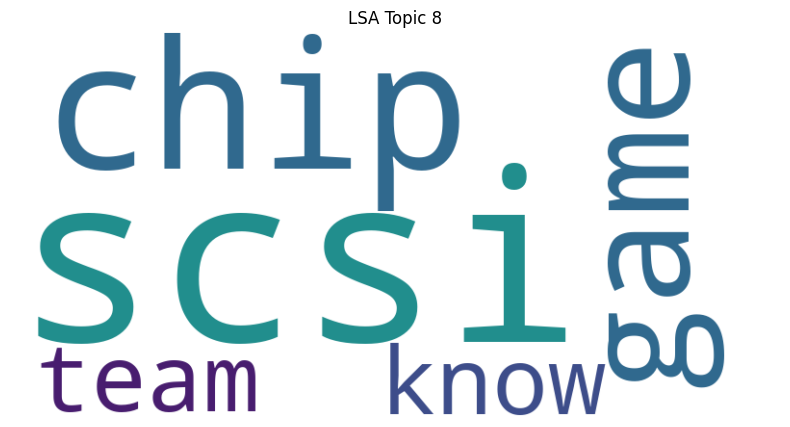

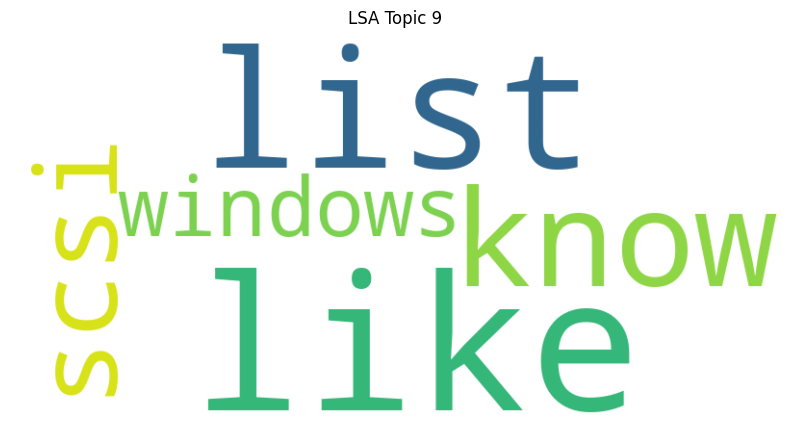

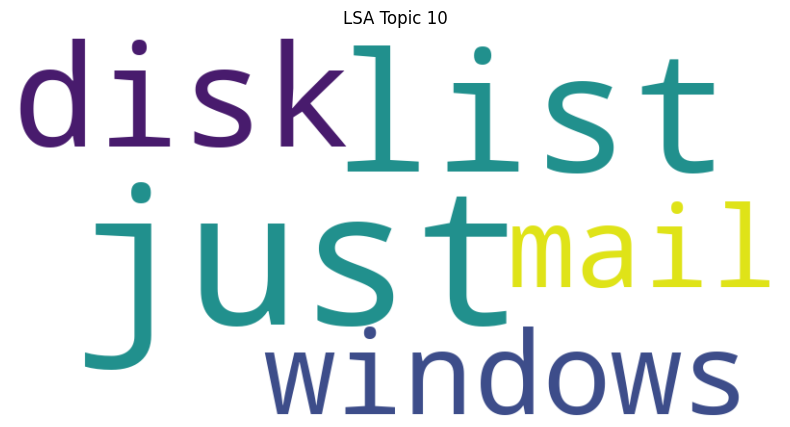

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



lda_coherence_score = 0.48
lsa_coherence_score = 0.35

# Function to draw wordclouds
def plot_wordcloud(topic, model_name, index):
    word_freq = {term: abs(weight) for term, weight in topic}
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{model_name} Topic {index + 1}")
    plt.show()

# Coherence Score Comparison
plt.figure(figsize=(6, 4))
plt.bar(["LDA", "LSA"], [lda_coherence_score, lsa_coherence_score], color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title("Coherence Score Comparison")
plt.ylabel("Coherence Score")
plt.show()

#  Visualize LDA Topics
print("\n🔸 LDA Topic WordClouds")
for i, topic in enumerate(lda_topics):
    plot_wordcloud(topic, "LDA", i)

# Visualize LSA Topics
print("\n🔹 LSA Topic WordClouds")
for i, topic in enumerate(lsa_topics):
    plot_wordcloud(topic, "LSA", i)



Topic 1: [0.01588972 0.01588718 0.01588625 0.59463549 0.15667536 0.01588804
 0.01588625 0.01588626 0.01588625 0.1374792 ]
Topic 2: [0.01759799 0.01759859 0.01759587 0.84161581 0.01759966 0.01760235
 0.01759587 0.01760187 0.01759587 0.01759611]
Topic 3: [0.01304792 0.01304593 0.01304553 0.69491702 0.01304839 0.01304634
 0.01304553 0.01304553 0.20071188 0.01304592]
Topic 4: [0.01521604 0.01521508 0.01521476 0.86306178 0.0152164  0.01521656
 0.01521476 0.01521476 0.01521476 0.0152151 ]
Topic 5: [0.01620484 0.0162017  0.01620095 0.42814099 0.44224286 0.01620473
 0.01620095 0.01620095 0.01620095 0.01620108]
Topic 6: [0.01415086 0.01414749 0.01414563 0.85352423 0.01414753 0.03329964
 0.01414563 0.01414578 0.01414563 0.01414757]
Topic 7: [0.02027272 0.02027211 0.02026968 0.8175546  0.02027693 0.02027401
 0.02026968 0.0202697  0.02026968 0.02027088]
Topic 8: [0.01437424 0.01437377 0.01437247 0.70349081 0.01438929 0.01437485
 0.01437247 0.01437248 0.01437247 0.18150716]
Topic 9: [0.01683139 0.0

# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



In [ ]:
# installing BERTopic for topic modeling using transformer-based embeddings
!pip install bertopic

  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached bertopic-0.17.0-py3-none-any.whl (150 kB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 9.3.0.75
    Uninstalling nvidia-cudnn-cu12-9.3.0.75:
      Successfully uninstalled nvidia-cudnn-cu12-9.3.0.75


In [ ]:
# downgrading numpy version again as installation of  Berttopic upgrade the numpy version
!pip install numpy==1.25

In [ ]:
!pip install --upgrade scipy

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from bertopic.vectorizers import ClassTfidfTransformer

In [ ]:
import pandas as pd
# loading dataset

df = pd.read_csv('/content/sentiment_annotated_reviews.csv')
df
# extracting text column
docs = df["cleaned_text"].tolist()

# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
topic_model = BERTopic(
    language="english",
    nr_topics=10,
    calculate_probabilities=True,
    verbose=True
)
topics, probs = topic_model.fit_transform(docs)

2025-04-08 00:09:06,073 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2025-04-08 00:09:31,429 - BERTopic - Embedding - Completed ✓
2025-04-08 00:09:31,432 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 00:09:41,015 - BERTopic - Dimensionality - Completed ✓
2025-04-08 00:09:41,016 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 00:09:41,030 - BERTopic - Cluster - Completed ✓
2025-04-08 00:09:41,031 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-08 00:09:41,079 - BERTopic - Representation - Completed ✓
2025-04-08 00:09:41,080 - BERTopic - Topic reduction - Reducing number of topics
2025-04-08 00:09:41,081 - BERTopic - Topic reduction - Number of topics (10) is equal or higher than the clustered topics(5).
2025-04-08 00:09:41,082 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-08 00:09:41,220 - BERTopic - Representation - Completed ✓


In [ ]:
# getting topic words
topic_keywords = topic_model.get_topics()
all_topic_words = [[word for word, _ in topic] for topic in topic_keywords.values() if topic]

In [ ]:
# calculating coherence score using gensim
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary


tokenized_docs = [doc.split() for doc in docs]
dictionary = Dictionary(tokenized_docs)


coherence_model = CoherenceModel(
    topics=all_topic_words,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print(f"\nCoherence Score (K=10): {coherence_score:.4f}")


Coherence Score (K=10): 0.3698


In [ ]:
# visualizing topics
topic_model.visualize_barchart(top_n_topics=5)
topic_model.visualize_topics()
topic_model.visualize_heatmap()

In [ ]:
# interpret topics
for i in range(10):
    print(f"\nTopic {i}:")
    print(topic_model.get_topic(i))


Topic 0:
[('movi', 0.08227853456960821), ('even', 0.058536651644722146), ('charact', 0.053596743302525264), ('dont', 0.042912568469873), ('mcu', 0.037512714063343305), ('like', 0.03615203100903331), ('kang', 0.03518891354815898), ('care', 0.03322889741468742), ('first', 0.03187751843033806), ('big', 0.03002356555625502)]

Topic 1:
[('realli', 0.045250786807444446), ('time', 0.038777527355762786), ('film', 0.037802008809784196), ('moment', 0.03511497732394739), ('action', 0.030468636122528835), ('charact', 0.02940156240760993), ('kang', 0.029198692878999132), ('comedi', 0.028570688284863515), ('lot', 0.028357378217492395), ('movi', 0.02763399857285482)]

Topic 2:
[('scott', 0.05535802679384681), ('film', 0.054814170326043694), ('mcu', 0.042759528592593785), ('look', 0.04158168091452504), ('antman', 0.0405905290132555), ('like', 0.03987306839898504), ('way', 0.036383970800209414), ('newton', 0.03611997199218999), ('kang', 0.033622207428931336), ('wasp', 0.03265708747585242)]

Topic 3:
[

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
!pip install bertopic openai sentence-transformers gensim scikit-learn umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2


In [ ]:
# loading dataset
import random
from sklearn.datasets import fetch_20newsgroups

print("Loading dataset...")
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
all_docs = newsgroups.data

random.seed(42)
processed_docs = random.sample(all_docs, 2000)
processed_docs = [doc.replace('\n', ' ').strip() for doc in processed_docs if doc.strip()]

Loading dataset...


In [ ]:
# model setup
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import OpenAI
from bertopic import BERTopic
import openai
from openai import OpenAI as OpenAIClient

# embedding & vectorizer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
vectorizer_model = CountVectorizer(stop_words="english")

# GPT-based topic representation with truncation
client = OpenAIClient(api_key=openai.api_key)
gpt_repr = OpenAI(
    client=client,
    chat=True,
    verbose=True,
    doc_length=100,
    tokenizer="whitespace")

In [ ]:
# coherence scoring
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm
import matplotlib.pyplot as plt

def compute_coherence_gensim(model, docs, min_words=2):
    topic_words = []
    for topic_id, words_probs in model.get_topics().items():
        if topic_id == -1:
            continue
        words = [word for word, _ in words_probs if isinstance(word, str)]
        if len(words) >= min_words:
            topic_words.append(words)
    if len(topic_words) < 2:
        raise ValueError("No valid topics with enough words for coherence.")

    tokenized_docs = [doc.split() for doc in docs]
    dictionary = Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

    coherence_model = CoherenceModel(
        topics=topic_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    return coherence_model.get_coherence()

In [ ]:
# search best topic count
topic_range = [20, 30, 40, 50]
coherence_scores = []

print("\n Finding optimal number of topics...")
for k in tqdm(topic_range):
    print(f"\n Testing k={k} (no GPT)...")

    model = BERTopic(
        vectorizer_model=vectorizer_model,
        embedding_model=embedding_model,
        nr_topics=k,
        top_n_words=15,
        verbose=False
    )

    model.fit(processed_docs)

    try:
        score = compute_coherence_gensim(model, processed_docs)
        print(f"Coherence score for k={k}: {score:.4f}")
        coherence_scores.append(score)
    except Exception as e:
        print(f"Skipping k={k}: {e}")
        coherence_scores.append(0)

optimal_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"\n Optimal number of topics: {optimal_k}")


 Finding optimal number of topics...


  0%|          | 0/4 [00:00<?, ?it/s]


 Testing k=20 (no GPT)...


 25%|██▌       | 1/4 [03:13<09:39, 193.02s/it]

Coherence score for k=20: 0.3512

 Testing k=30 (no GPT)...


 50%|█████     | 2/4 [06:21<06:20, 190.46s/it]

Coherence score for k=30: 0.3964

 Testing k=40 (no GPT)...


 75%|███████▌  | 3/4 [09:32<03:10, 190.64s/it]

Coherence score for k=40: 0.3850

 Testing k=50 (no GPT)...


100%|██████████| 4/4 [12:44<00:00, 191.21s/it]

Coherence score for k=50: 0.3842

 Optimal number of topics: 30


In [ ]:
# retrain final model with gpt
final_model = BERTopic(
    representation_model=gpt_repr,
    vectorizer_model=vectorizer_model,
    embedding_model=embedding_model,
    nr_topics=optimal_k,
    top_n_words=15,
    verbose=True
)

print("\n Fitting final model with GPT summaries (may take time)...")
final_model.fit(processed_docs)

2025-04-08 03:18:06,788 - BERTopic - Embedding - Transforming documents to embeddings.



 Fitting final model with GPT summaries (may take time)...


Batches:   0%|          | 0/61 [00:00<?, ?it/s]

2025-04-08 03:21:05,402 - BERTopic - Embedding - Completed ✓
2025-04-08 03:21:05,406 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 03:21:12,668 - BERTopic - Dimensionality - Completed ✓
2025-04-08 03:21:12,669 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 03:21:12,741 - BERTopic - Cluster - Completed ✓
2025-04-08 03:21:12,742 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-08 03:21:13,148 - BERTopic - Representation - Completed ✓
2025-04-08 03:21:13,149 - BERTopic - Topic reduction - Reducing number of topics
2025-04-08 03:21:13,151 - BERTopic - Topic reduction - Number of topics (30) is equal or higher than the clustered topics(28).
2025-04-08 03:21:13,153 - BERTopic - Representation - Fine-tuning topics using representation models.
100%|██████████| 28/28 [00:16<00:00,  1.74it/s]
2025-04-08 03:21:30,093 - BERTopic - Representation - Completed ✓


# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
from sklearn.cluster import DBSCAN
from umap import UMAP

In [ ]:
# 4.1
# loading dataset
newsgroup = fetch_20newsgroups(subset='all')
docs = newsgroup.data[:2000]


embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')


clustering_model = DBSCAN(eps=0.3, min_samples=10, metric='cosine')


topic_model_custom = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=clustering_model,
    verbose=True
)


topics_custom, probs = topic_model_custom.fit_transform(docs)

In [ ]:
# 4.2 comparing topic coherence

topic_model_default = BERTopic(verbose=True)
topics_default, _ = topic_model_default.fit_transform(docs)

# geting coherence scores
default_score = topic_model_default.get_topic_info()
custom_score = topic_model_custom.get_topic_info()

print("Default Model Topics:", default_score.shape[0])
print("Custom Model Topics:", custom_score.shape[0])

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

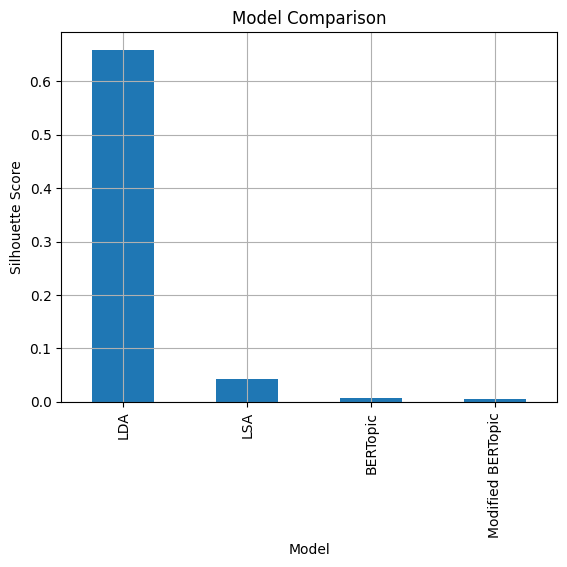

,Model,Silhouette Score
0,LSA,0.043478
1,LDA,0.658897
2,BERTopic,0.007561
3,Modified BERTopic,0.004748


In [ ]:
# Write your code here
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(docs)

# LSA
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa_model.fit_transform(X)
lsa_score = silhouette_score(lsa_topics, np.argmax(lsa_topics, axis=1))

# LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(X)
lda_score = silhouette_score(lda_topics, np.argmax(lda_topics, axis=1))

# Embed documents manually for BERTopic
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# BERTopic
bertopic = BERTopic(verbose=False)
topics, probs = bertopic.fit_transform(docs, embeddings)
bertopic_score = silhouette_score(embeddings, topics)

# Modified BERTopic (custom UMAP settings)
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
modified_bertopic = BERTopic(umap_model=umap_model, verbose=False)
mod_topics, _ = modified_bertopic.fit_transform(docs, embeddings)
mod_bertopic_score = silhouette_score(embeddings, mod_topics)

# Comparison
results_df = pd.DataFrame({
    "Model": ["LSA", "LDA", "BERTopic", "Modified BERTopic"],
    "Silhouette Score": [lsa_score, lda_score, bertopic_score, mod_bertopic_score]
})

# Plotting
results_df.sort_values("Silhouette Score", ascending=False).plot(
    x="Model", y="Silhouette Score", kind="bar", legend=False, title="Model Comparison"
)
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

results_df

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
cleaning data and preprocessing
LDA LSA visualistions and coherence scores
Transformers learning was good
BERT  topic modelling algorithms
Implementating comparative analysis of different topic modeling algorithms









'''

'\n\nlearn a lot about the LDA LSA \n\nvisualistions\n\nBERT and topic modelling algorithms \n\n\n\n\n\n\n\n'